In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target density (unnormalized)
def p_star(x):
    return np.exp(-0.5 * np.dot(x, x))  # proportional to N(0, I2)

# Random-walk Metropolis sampler
def rw_metropolis(p_star, N, theta0, eps):
    theta = np.zeros((N, len(theta0)))
    theta[0] = theta0
    accept = 0

    for i in range(1, N):
        proposal = theta[i-1] + eps * np.random.randn(len(theta0))
        alpha = min(1.0, p_star(proposal) / p_star(theta[i-1]))

        if np.random.rand() < alpha:
            theta[i] = proposal
            accept += 1
        else:
            theta[i] = theta[i-1]

    return theta, accept / (N - 1)

Acceptance rate: 0.5641128225645129


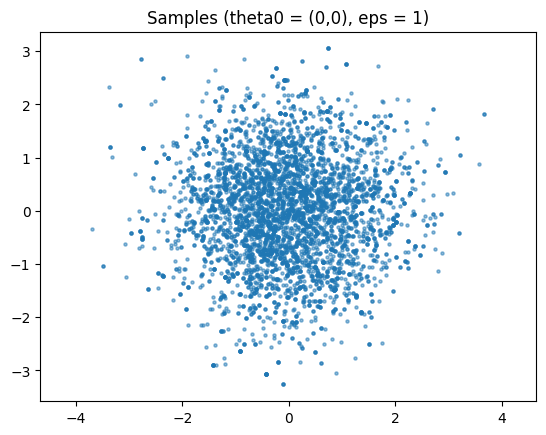

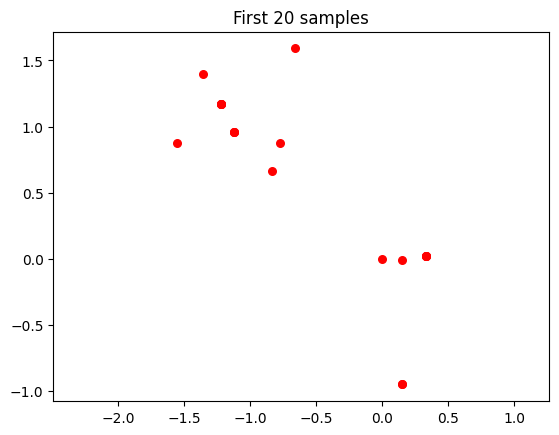

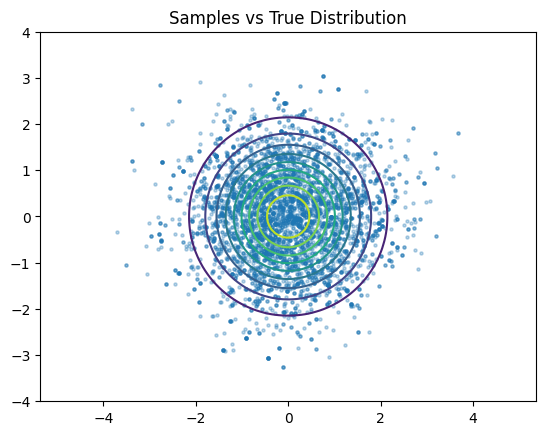

In [2]:
# --------- (b) theta0 = (0,0), eps = 1 ----------
N = 5000
theta0 = np.array([0.0, 0.0])
eps = 1.0

samples, acc_rate = rw_metropolis(p_star, N, theta0, eps)
print("Acceptance rate:", acc_rate)

plt.figure()
plt.scatter(samples[:,0], samples[:,1], s=5, alpha=0.5)
plt.title("Samples (theta0 = (0,0), eps = 1)")
plt.axis("equal")
plt.show()

plt.figure()
plt.scatter(samples[:20,0], samples[:20,1], c="red", s=30)
plt.title("First 20 samples")
plt.axis("equal")
plt.show()

# Plot true distribution contours
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = p_star(np.array([X[i, j], Y[i, j]]))

plt.figure()
plt.contour(X, Y, Z, levels=10)
plt.scatter(samples[:,0], samples[:,1], s=5, alpha=0.3)
plt.title("Samples vs True Distribution")
plt.axis("equal")
plt.show()


Acceptance rate (far start): 0.16783356671334268


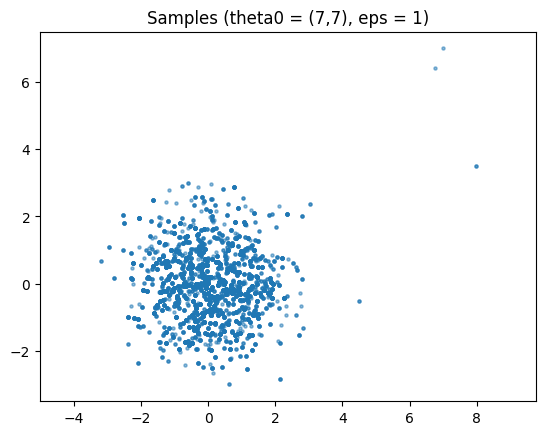

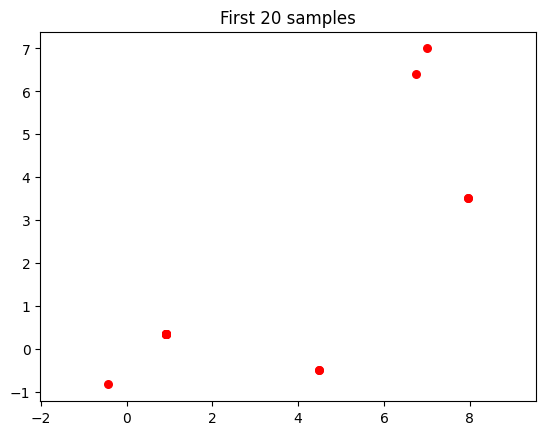

In [5]:
# --------- (c) theta0 = (7,7), eps = 1 ----------
theta0_far = np.array([7.0, 7.0])
samples_far, acc_rate_far = rw_metropolis(p_star, N, theta0_far, eps)
print("Acceptance rate (far start):", acc_rate_far)

plt.figure()
plt.scatter(samples_far[:,0], samples_far[:,1], s=5, alpha=0.5)
plt.title("Samples (theta0 = (7,7), eps = 1)")
plt.axis("equal")
plt.show()

plt.figure()
plt.scatter(samples_far[:20,0], samples_far[:20,1], c="red", s=30)
plt.title("First 20 samples")
plt.axis("equal")
plt.show()


eps = 0.2, acceptance rate = 0.893


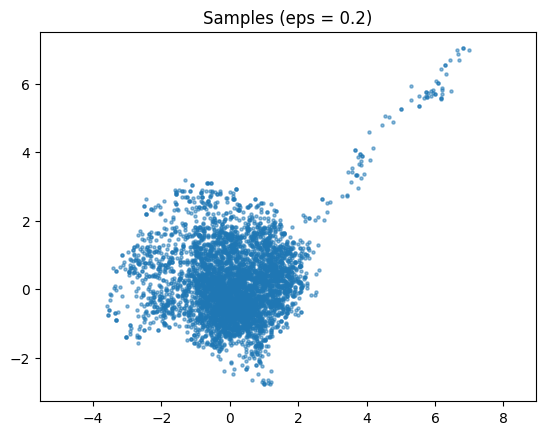

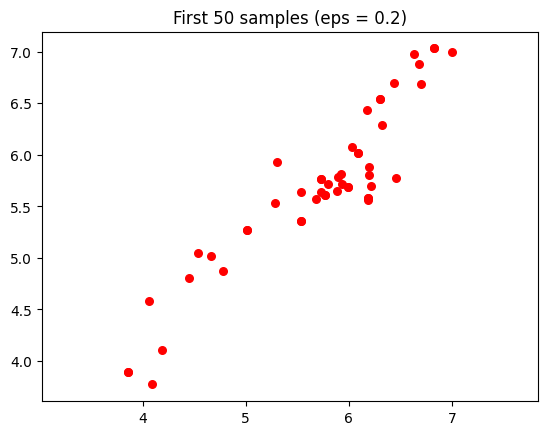

eps = 1.0, acceptance rate = 0.547


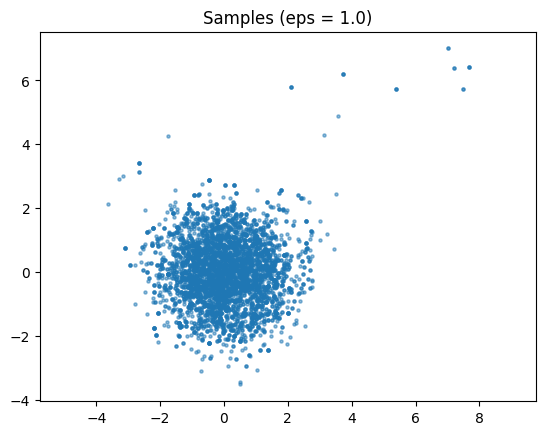

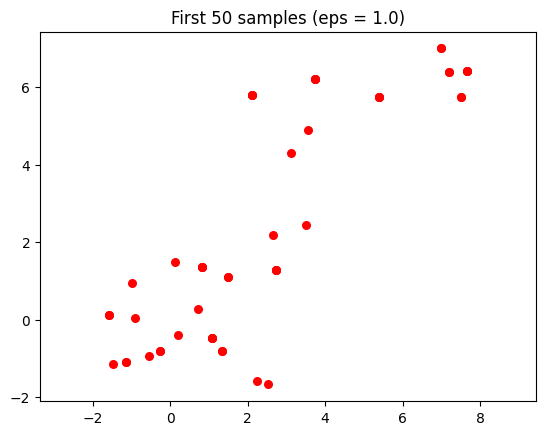

eps = 3.0, acceptance rate = 0.164


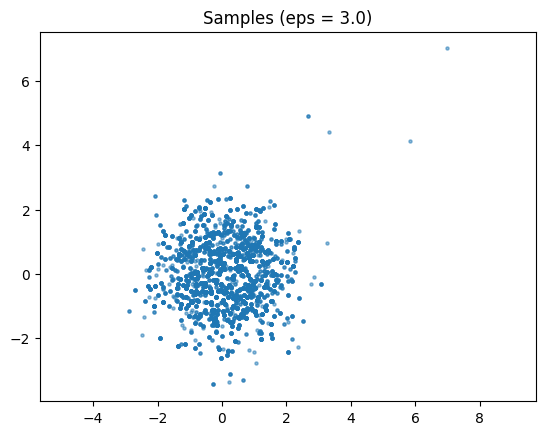

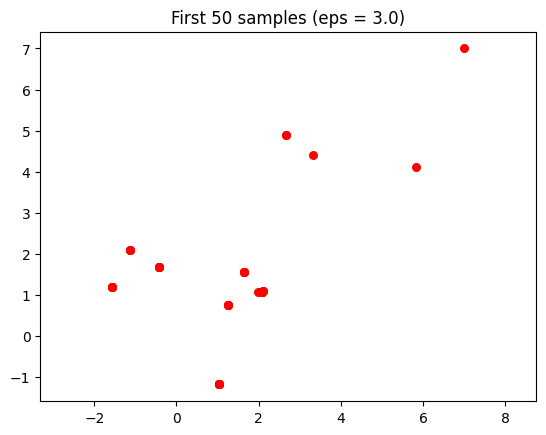

In [4]:
# --------- (d) effect of eps ----------
eps_values = [0.2, 1.0, 3.0]

for eps in eps_values:
    samples_eps, acc = rw_metropolis(p_star, N, theta0_far, eps)
    print(f"eps = {eps}, acceptance rate = {acc:.3f}")

    plt.figure()
    plt.scatter(samples_eps[:,0], samples_eps[:,1], s=5, alpha=0.5)
    plt.title(f"Samples (eps = {eps})")
    plt.axis("equal")
    plt.show()

    plt.figure()
    plt.scatter(samples_eps[:50,0], samples_eps[:50,1], c="red", s=30)
    plt.title(f"First 50 samples (eps = {eps})")
    plt.axis("equal")
    plt.show()